In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
from time import time


In [10]:
def get_date(df, year, month):
    df_filtered = df.loc[(df['Year'] == year) & (df['Month'] == month)]
    return df_filtered

In [11]:
def Linear_Score(clf, x_train, x_test, y_test, y_train, model_name):
    print("#################################")
    start_time = time()
    print("Start at: {}".format(start_time))
    print(model_name)
    train_score = clf.score(x_train, y_train)
    print("Train Score:{}".format(train_score))
    test_score = clf.score(x_test, y_test)
    print("Test Score:{}".format(test_score))
    print("Finished at: {}".format(time()))
    print("--- {} seconds ---".format(time() - start_time))
    return train_score, test_score


def Naive_Bayes(x_train, y_train):
    gnb = GaussianNB().fit(x_train, y_train)
    return gnb


def Linear_Regression(x_train, y_train):
    reg = LinearRegression().fit(x_train, y_train)
    return reg


def Linear_BayesianRidge(x_train, y_train):
    reg = linear_model.BayesianRidge().fit(x_train, y_train)
    return reg


def Linear_Pipeline(x_train, y_train):
    model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))]).fit(
        x_train, y_train)
    return model


def Linear_Perceptron(x_train, y_train):
    clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(x_train, y_train)
    return clf

In [12]:
df=pd.read_csv(".{0}CSVs{0}final_df.csv".format(os.sep))
Vegetation_Value = []
Vegetation_Date = []
Land_Surface_Temperature_Value = []
Land_Surface_Temperature_Date = []
Snow_Cover_Value = []
Snow_Cover_Date = []
Fire_Value = []
Fire_Date = []
Land_Surface_Temperature_Anomaly_Value = []
Land_Surface_Temperature_Anomaly_Date = []
Net_Primary_Productivity_Value = []
Net_Primary_Productivity_Date = []
months=df['Month'].unique()
years=df['Year'].unique()
for year in years:
    for month in months:
        date = get_date(df, year, month)

        Vegetation_mean_Value = date['Vegetation Color Index'].mean()
        if Vegetation_mean_Value != -1:
            Vegetation_Value.append(Vegetation_mean_Value)
        else:
            Vegetation_Value.append(np.nan)
        Vegetation_Date.append(str(year)+"."+str(month))

        Land_Surface_Temperature_mean_Value = date['Land Surface Temperature Color Index'].mean()
        if Land_Surface_Temperature_mean_Value != -1:
            Land_Surface_Temperature_Value.append(Land_Surface_Temperature_mean_Value)
        else:
            Land_Surface_Temperature_Value.append(np.nan)
        Land_Surface_Temperature_Date.append(str(month)+'.'+str(year))

        Snow_Cover_mean_Value = date['Snow Cover Color Index'].mean()
        if Snow_Cover_mean_Value != -1:
            Snow_Cover_Value.append(Snow_Cover_mean_Value)
        else:
            Snow_Cover_Value.append(np.nan)
        Snow_Cover_Date.append(str(month)+'.'+str(year))

        Fire_mean_Value = date['Fire Color Index'].mean()
        if Fire_mean_Value != -1:
            Fire_Value.append(Fire_mean_Value)
        else:
            Fire_Value.append(np.nan)
        Fire_Date.append(str(month)+'.'+str(year))

        Land_Surface_Temperature_Anomaly_mean_Value = date['Land Surface Temperature Anomaly Color Index'].mean()
        if Land_Surface_Temperature_Anomaly_mean_Value != -1:
            Land_Surface_Temperature_Anomaly_Value.append(Land_Surface_Temperature_Anomaly_mean_Value)
        else:
            Land_Surface_Temperature_Anomaly_Value.append(np.nan)
        Land_Surface_Temperature_Anomaly_Date.append(str(month)+'.'+str(year))


        Net_Primary_Productivity_mean_Value = date['Net Primary Productivity Color Index'].mean()
        if Net_Primary_Productivity_mean_Value != -1:
            Net_Primary_Productivity_Value.append(Net_Primary_Productivity_mean_Value)
        else:
            Net_Primary_Productivity_Value.append(np.nan)
        Net_Primary_Productivity_Date.append(str(month)+'.'+str(year))


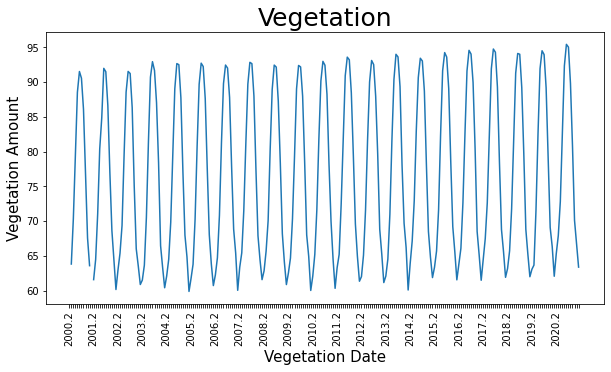

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Vegetation_Date,Vegetation_Value)
ax.set_xlabel('Vegetation Date',fontsize = 15)
ax.set_ylabel('Vegetation Amount',fontsize = 15)
ax.set_title('Vegetation', fontsize = 25)
plt.xticks(rotation=90)
for num,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if (num%12) != 0 :
        label.set_visible(False)
plt.savefig('./Visualization/Vegetation.png')

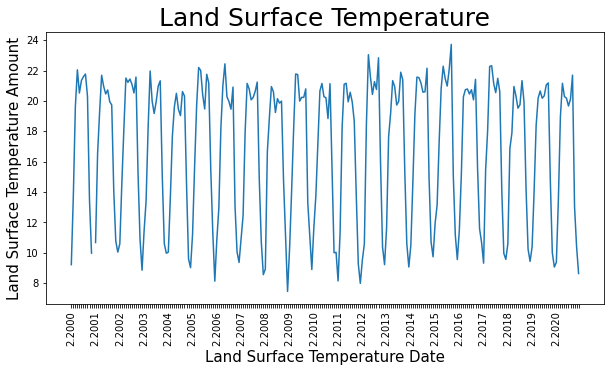

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Land_Surface_Temperature_Date,Land_Surface_Temperature_Value)
ax.set_xlabel('Land Surface Temperature Date',fontsize = 15)
ax.set_ylabel('Land Surface Temperature Amount',fontsize = 15)
ax.set_title('Land Surface Temperature', fontsize = 25)
plt.xticks(rotation=90)
for num,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if (num%12) != 0 :
        label.set_visible(False)
plt.savefig('./Visualization/Land_Surface_Temperature.png')

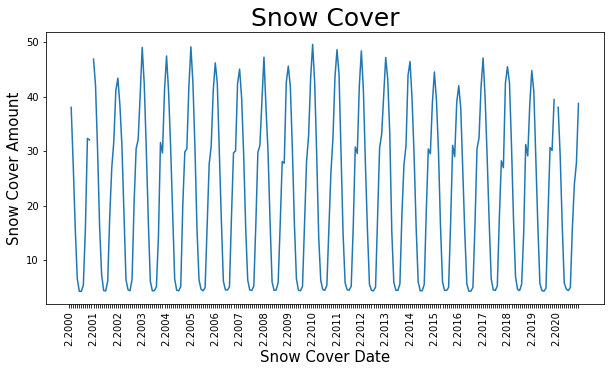

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Snow_Cover_Date,Snow_Cover_Value)
ax.set_xlabel('Snow Cover Date',fontsize = 15)
ax.set_ylabel('Snow Cover Amount',fontsize = 15)
ax.set_title('Snow Cover', fontsize = 25)
plt.xticks(rotation=90)
for num,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if (num%12) != 0 :
        label.set_visible(False)
plt.savefig('./Visualization/Snow_Cover.png')

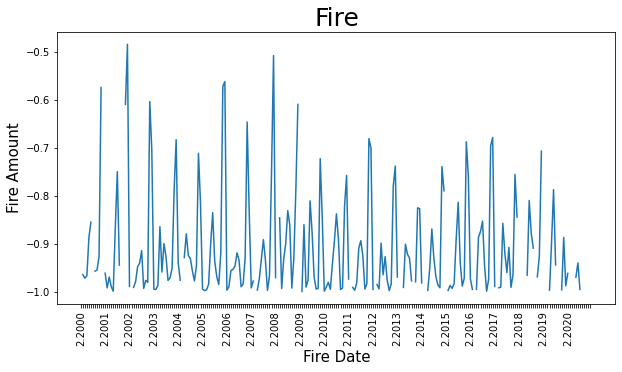

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Fire_Date,Fire_Value)
ax.set_xlabel('Fire Date',fontsize = 15)
ax.set_ylabel('Fire Amount',fontsize = 15)
ax.set_title('Fire', fontsize = 25)
plt.xticks(rotation=90)
for num,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if (num%12) != 0 :
        label.set_visible(False)
plt.savefig('./Visualization/Fire.png')

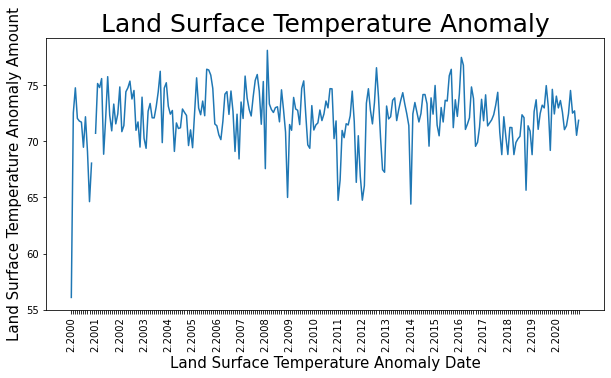

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Land_Surface_Temperature_Anomaly_Date,Land_Surface_Temperature_Anomaly_Value)
ax.set_xlabel('Land Surface Temperature Anomaly Date',fontsize = 15)
ax.set_ylabel('Land Surface Temperature Anomaly Amount',fontsize = 15)
ax.set_title('Land Surface Temperature Anomaly', fontsize = 25)
plt.xticks(rotation=90)
for num,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if (num%12) != 0 :
        label.set_visible(False)
plt.savefig('./Visualization/Land_Surface_Temperature_Anomaly.png')

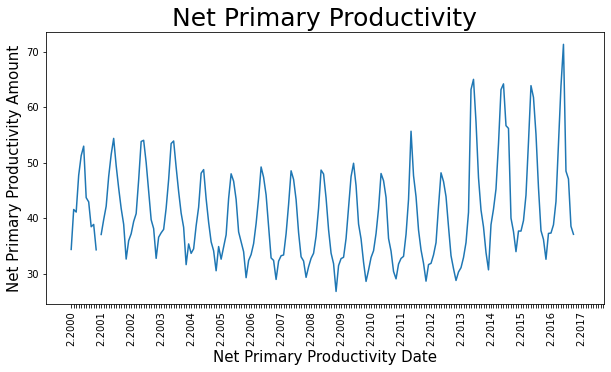

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Net_Primary_Productivity_Date,Net_Primary_Productivity_Value)
ax.set_xlabel('Net Primary Productivity Date',fontsize = 15)
ax.set_ylabel('Net Primary Productivity Amount',fontsize = 15)
ax.set_title('Net Primary Productivity', fontsize = 25)
plt.xticks(rotation=90)
for num,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if (num%12) != 0 :
        label.set_visible(False)
plt.savefig('./Visualization/Net_Primary_Productivity.png')

In [24]:
df2 = pd.DataFrame({'Vegetation': Vegetation_Value, 'Land Surface Temperature': Land_Surface_Temperature_Value, 
                   "Snow Cover": Snow_Cover_Value,'Fire':Fire_Value ,
                   'Land Surface Temperature Anomaly' : Land_Surface_Temperature_Anomaly_Value,
                   'Net Primary Productivity' : Net_Primary_Productivity_Value})
df2.head()


,Vegetation,Land Surface Temperature,Snow Cover,Fire,Land Surface Temperature Anomaly,Net Primary Productivity
0,NaN,9.214143,NaN,NaN,56.076834,34.337148
1,63.822892,13.741146,38.035852,-0.963221,72.563860,41.536335
2,70.339042,19.626152,27.457430,-0.970778,74.790553,41.075985
3,79.569543,22.049427,15.816006,-0.965924,72.057931,47.695468
4,88.539275,20.520787,6.534204,-0.886091,71.820899,51.243326


array([[<AxesSubplot:xlabel='Vegetation', ylabel='Vegetation'>,
        <AxesSubplot:xlabel='Land Surface Temperature', ylabel='Vegetation'>,
        <AxesSubplot:xlabel='Snow Cover', ylabel='Vegetation'>,
        <AxesSubplot:xlabel='Fire', ylabel='Vegetation'>,
        <AxesSubplot:xlabel='Land Surface Temperature Anomaly', ylabel='Vegetation'>,
        <AxesSubplot:xlabel='Net Primary Productivity', ylabel='Vegetation'>],
       [<AxesSubplot:xlabel='Vegetation', ylabel='Land Surface Temperature'>,
        <AxesSubplot:xlabel='Land Surface Temperature', ylabel='Land Surface Temperature'>,
        <AxesSubplot:xlabel='Snow Cover', ylabel='Land Surface Temperature'>,
        <AxesSubplot:xlabel='Fire', ylabel='Land Surface Temperature'>,
        <AxesSubplot:xlabel='Land Surface Temperature Anomaly', ylabel='Land Surface Temperature'>,
        <AxesSubplot:xlabel='Net Primary Productivity', ylabel='Land Surface Temperature'>],
       [<AxesSubplot:xlabel='Vegetation', ylabel='Snow Cov

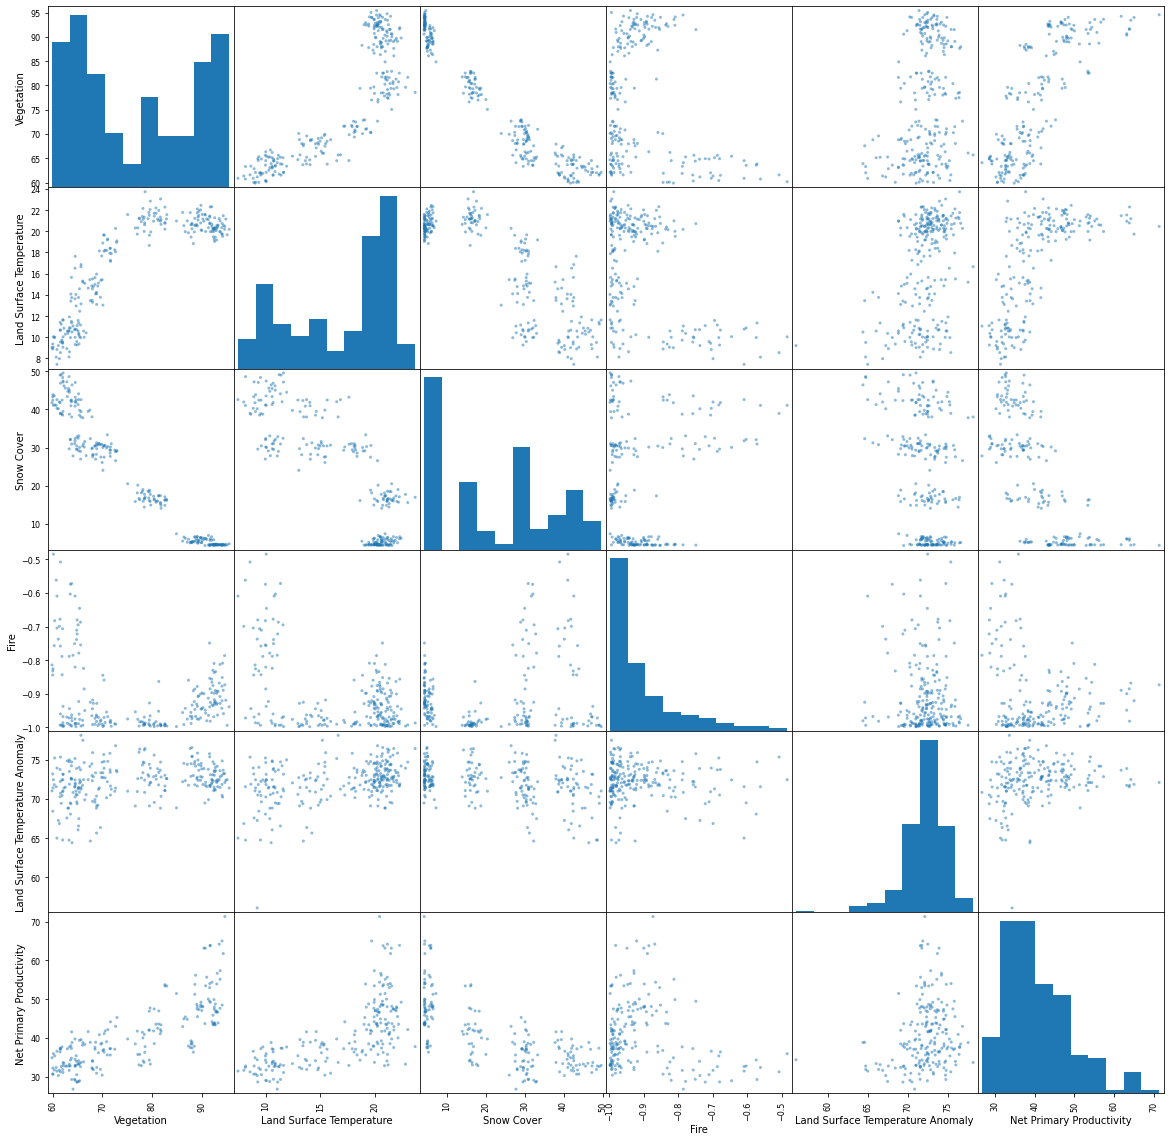

In [25]:

pd.plotting.scatter_matrix(df2, alpha=0.5,figsize = (20,20))


In [27]:
def Model_plots (labels, train_accuracy,test_acuracy,column_name):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(10,6))
    rects1 = ax.bar(x - width/2, train_accuracy, width, label='train accuracy')
    rects2 = ax.bar(x + width/2, test_acuracy, width, label='test acuracy')
    ax.set_ylabel('accuracy')
    ax.set_title('accuracy of {} models'.format(column_name))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.ylim([0,100])
    plt.xticks(rotation='45')
    ax.legend()
    print(fig)

In [28]:
def Models_scores (df, column_name):
    x = df[df.columns[(df.columns == 'X') | (df.columns == 'Y') | (df.columns == 'Year') | (df.columns == 'Month') | 
            (df.columns == '{} Is Valuable'.format(column_name))]]
    y = df['{} Color Index'.format(column_name)]
    x_test = x.loc[(x['Year'] == 2020) & (x['Month'] == 12)]
    x_train = x.loc[(x['Year'] != 2020) | (x['Month'] != 12)]
    y_test = y.loc[(x['Year'] == 2020) & (x['Month'] == 12)]
    y_train = y.loc[(x['Year'] != 2020) | (x['Month'] != 12)]
    
    scaler = StandardScaler()
    x_scale_train = scaler.fit_transform(x_train)
    x_scale_test = scaler.transform(x_test)
    
    Linear_Regression_clf = Linear_Regression(x_scale_train, y_train)
    Linear_Pipeline_clf = Linear_Pipeline(x_scale_train, y_train)
    Linear_BayesianRidge_clf = Linear_BayesianRidge(x_scale_train, y_train)
    Linear_Perceptron_clf = Linear_Perceptron(x_scale_train, y_train)
    Naive_Bayes_clf = Naive_Bayes(x_scale_train, y_train)

    Linear_Regression_Score = Linear_Score(Linear_Regression_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Regression")
    Linear_Pipeline_Score = Linear_Score(Linear_Pipeline_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Pipeline")
    Linear_BayesianRidge_Score = Linear_Score(Linear_BayesianRidge_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear BayesianRidge")
    Linear_Perceptron_Score = Linear_Score(Linear_Perceptron_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Perceptron")
    Naive_Bayes_Score = Linear_Score(Naive_Bayes_clf, x_scale_train, x_scale_test, y_test, y_train, "Naive Bayes")
      
    labels = ['Linear_Regression', 'Linear_Pipeline','Linear_BayesianRidge' ,'Linear_Perceptron', 'Naive_Bayes']
    train_accuracy = [Linear_Regression_Score[0]*100, Linear_Pipeline_Score[0]*100, Linear_BayesianRidge_Score[0]*100,Linear_Perceptron_Score[0]*100,Naive_Bayes_Score[0]*100]
    test_acuracy = [Linear_Regression_Score[1]*100, Linear_Pipeline_Score[1]*100, Linear_BayesianRidge_Score[1]*100, Linear_Perceptron_Score[1]*100,Naive_Bayes_Score[1]*100]
    Model_plots (labels, train_accuracy,test_acuracy,column_name)

#################################
Start at: 1613861413.5437276
Linear Regression
Train Score:0.34862181786011004
Test Score:0.3561910038213567
Finished at: 1613861413.8495643
--- 0.30583667755126953 seconds ---
#################################
Start at: 1613861413.8495643
Linear Pipeline
Train Score:0.4521439798758601
Test Score:0.4016253279197226
Finished at: 1613861419.5874963
--- 5.737931966781616 seconds ---
#################################
Start at: 1613861419.5874963
Linear BayesianRidge
Train Score:0.34859714475427395
Test Score:0.3562324341766765
Finished at: 1613861419.9214923
--- 0.333996057510376 seconds ---
#################################
Start at: 1613861419.9214923
Linear Perceptron
Train Score:0.11807770170280776
Test Score:0.1754109034944062
Finished at: 1613861572.405816
--- 152.4843237400055 seconds ---
#################################
Start at: 1613861572.405816
Naive Bayes
Train Score:0.16246577612912136
Test Score:0.20342929302894575
Finished at: 1613861863.52

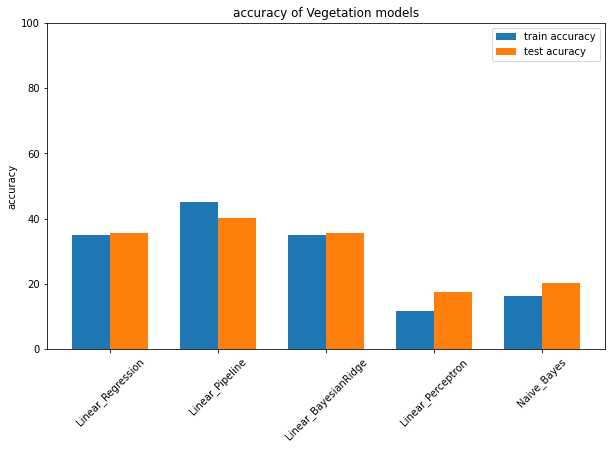

In [29]:
map_types= ['Vegetation', 'Land Surface Temperature', 'Snow Cover','Fire','Net Primary Productivity', 'Land Surface Temperature Anomaly']
for map_type in map_types:
    Models_scores (df, map_type)